In [4]:
# Import modules and mnist dataset
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

from keras.datasets import mnist

## Get the data and split it into training and testing sets
The dataset from the keras is a tuple of ((x_train, y_train), (x_test, y_test)).

In [5]:
dataset = mnist.load_data()

training_data = dataset[0]
'''
The training set is a portion of the data used to train the model
'''

testing_data = dataset[1]
'''
The testing set is a smaller portion of the data used to validate how
well the model performs with new/unseen data.
This set will be used to validate the final model.
'''
X_train = training_data[0]
X_test = testing_data[0]

y_train = training_data[1]
y_test = testing_data[1]

#Reshape the X data into a 2D vector
X_train = X_train.reshape(X_train.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Split the training dataset to get the additional validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size= 0.2, random_state= 1)


## Create a random forest model and fit the data

In [6]:
random_forest = RandomForestClassifier(random_state= 1)
random_forest.fit(X_test, y_test)


RandomForestClassifier(random_state=1)

## Looking at some performance numbers of the base random forest model

In [7]:
print('Base random forest performance:', random_forest.score(X_val, y_val))

Base random forest performance: 0.9454166666666667


It looks like the base model is performing quite well already.

## Improving the performance of the classifier
To improve the performance, I will tune the n_estimators and the max_depth. paramenter.
n_estimators specifies the number of unrelated trees.
max_depth specifies how many branching the trees can have.

From the previous task, I saw that accuracy can be improved if n_estimators and max_depth are tweaked to the right number.

In [8]:
# Exploring scores using a different number of estimators

estimator_scores_val = []
estimator_scores_train = []

estimators = []
for i in tqdm(range(1,11)): # Using tmqd here to get a progress bar
 estimator_num = i*5
 forest = RandomForestClassifier(n_estimators=estimator_num, random_state=1)
 forest.fit(X_train, y_train)
 estimators.append(estimator_num)
 estimator_scores_val.append(forest.score(X_val, y_val))
 estimator_scores_train.append(forest.score(X_train, y_train))



100%|██████████| 10/10 [01:02<00:00,  6.25s/it]


In [38]:
# Exploring score using different depth levels

depth_scores_val = []
depth_scores_train = []

# Looking at the first 10 depths
for depth in tqdm(range(1,11)): #tqdm again for a progress bar
 forest = RandomForestClassifier(random_state=1, max_depth= depth)
 forest.fit(X_train, y_train)
 depth_scores_val.append(forest.score(X_val, y_val))
 depth_scores_train.append(forest.score(X_train, y_train))


100%|██████████| 10/10 [03:07<00:00, 18.73s/it]


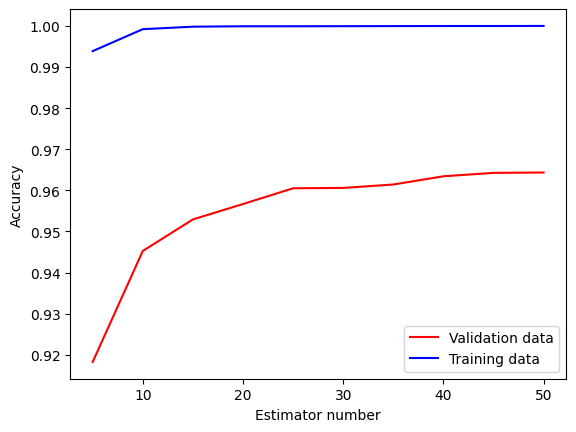

In [9]:
#Plot the scores based on estimator numbers
fig = plt.figure()
plt.plot(estimators, estimator_scores_val, color = 'r', label = 'Validation data')
plt.plot(estimators, estimator_scores_train, color = 'b', label = 'Training data')
plt.xlabel('Estimator number')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

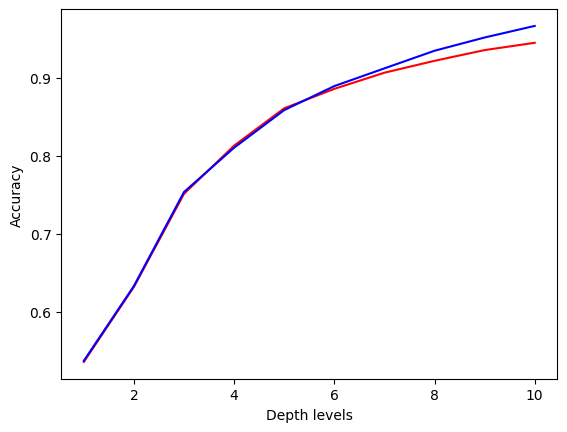

In [40]:
#Plot the scores based on depth
fig = plt.figure()

depths = np.arange(1, len(depth_scores_val)+1)

fig = plt.figure()
plt.plot(depths, depth_scores_val, c = 'r', label = 'Validation data')
plt.plot(depths, depth_scores_train, c = 'b', label = 'Training data')
plt.xlabel('Depth levels')
plt.ylabel('Accuracy')
plt.show()

Based on these results, it looks like the random forest model performs best with 10 estimators. 

On the training data the accuracy is very close to 1 (but not quite).
However, on the validation/development data, the accuracy is ~0.93, suggesting that the model still performs well on unseen data.

The ideal depth level seems to be 6.

A high and similar accuracy is observed on both the validation and training data.

## Build the tuned model and test it's performance on the testing set

In [41]:
final_forest = RandomForestClassifier(max_depth= 6, n_estimators= 10, random_state= 1)
final_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred = final_forest.predict(X_test)

## Confusion matrix and other performance matrix of the improved random forest model

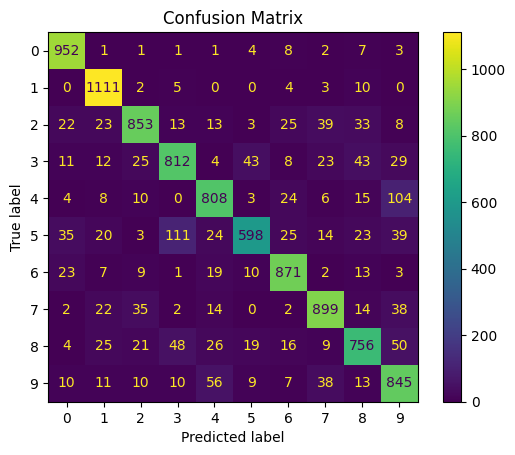

In [51]:
from sklearn import metrics

conf_mat = metrics.confusion_matrix(y_test, y_pred)
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Confusion Matrix')
plt.show()

In [70]:
# Hardest class to guess
f = metrics.f1_score(y_test, y_pred, average=None)
lowest_score = min(f)
classes = np.unique(y_test)
hardest_class = classes[list(f).index(lowest_score)]
print('Hardest class:', hardest_class)


Hardest class: 5


It looks like the final random forest model performed fairly well with unseen data.

However, it seems that number 5 was the hardest to classify correctly.

I guess this is because it has roughly similar shape to other numbers. Interesting!

In [76]:
f1 = metrics.f1_score(y_test, y_pred, average='micro')
precision = metrics.precision_score(y_test, y_pred, average = 'micro')
recall = metrics.recall_score(y_test, y_pred, average = 'micro')

print('Final accuracy:', final_forest.score(X_test, y_test), ' \n')
print('Final precision:', precision, '\n')
print('Final recall:', recall, '\n')
print('Final F1-Score:', f1, '\n')

Final accuracy: 0.8505  

Final precision: 0.8505 

Final recall: 0.8505 

Final F1-Score: 0.8505 

